# Exploratory Data Analysis

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the packages needed for exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set directory
data_dir = r'C:\Users\edwin\OneDrive - The University of Manchester\Data_Science\Msc_Data_Science\stats 2\vertebral+column'

os.chdir(data_dir)

In [4]:
# List of desired column names
columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope',
'pelvic radius', 'grade of spondylolisthesis', 'class']

# Load the dataset from the existing directory
df = pd.read_csv('column_2C.dat', names = columns, sep = ' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic incidence            310 non-null    float64
 1   pelvic tilt                 310 non-null    float64
 2   lumbar lordosis angle       310 non-null    float64
 3   sacral slope                310 non-null    float64
 4   pelvic radius               310 non-null    float64
 5   grade of spondylolisthesis  310 non-null    float64
 6   class                       310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


For proper analysis, the definition of the metrics and their range must  wd The following provides the information about each metric with reliable sources:
- pelvic incidence:
    pelvic incidence can vary from 33° to 85° in the normal population, pelvic incidence is in fact the sum of pelvic tilt and sacral slope of the subjects.
    
   https://link.springer.com/article/10.1007/s00586-011-1923-2
    
- pelvic tilt:
    demonstrated an average of 13 (+/- 6) degrees of anterior pelvic tilt with range of -4.5 - 27 degrees of anterior pelvic tilt in asymptomatic adults. 
    
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8486407/
- lumber lordosis angle:
    means men (28.39◦ ± 0.47◦ (SEM))and women (28.59◦ ± 0.43◦ (SEM))

    https://www.researchgate.net/publication/51710697_Effect_of_Age_and_Lordotic_Angle_on_the_Level_of_Lumbar_Disc_Herniation
    
- sacral slope:
    https://journals.sagepub.com/doi/epub/10.1177/2309499019888809
    
- pelvic radius:
    
- grade of spondylolisthesis: The level of pain the patient experiences around the lower back,  the greater the value, the worse the pain.
    
- class:
    There are two classes of pelvis in the dataset:
    1) Normal: An asymptomatic pelvis
    2) Abnormal: The pelvis of a disk hernia or spondilolysthesis patient.

In [5]:
df.tail()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO


In [6]:
# Convert class variable to boolean type
df['class'] = df['class'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   pelvic incidence            310 non-null    float64 
 1   pelvic tilt                 310 non-null    float64 
 2   lumbar lordosis angle       310 non-null    float64 
 3   sacral slope                310 non-null    float64 
 4   pelvic radius               310 non-null    float64 
 5   grade of spondylolisthesis  310 non-null    float64 
 6   class                       310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


In [8]:
# Count each classes
df['class'].value_counts()

class
AB    210
NO    100
Name: count, dtype: int64

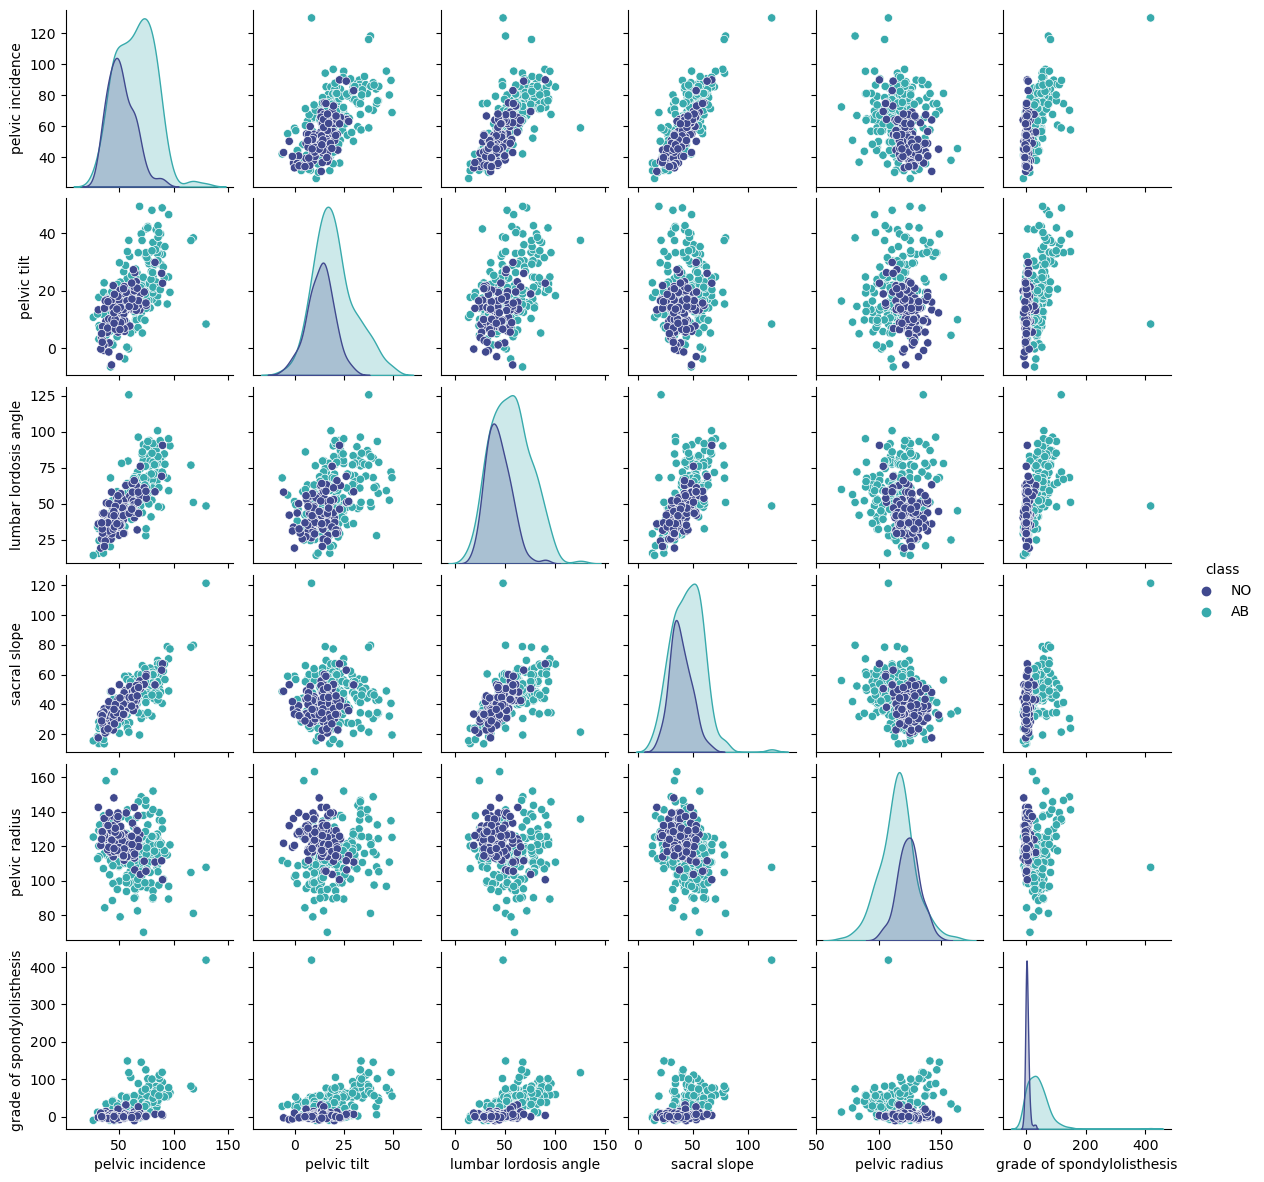

In [9]:
# Plot the distribution of each class
sns.pairplot(df, hue="class", hue_order = ["NO", "AB"], palette = "mako",height=2)
plt.show()

There are differences between the two classes. The measurements for the abnormal pelvis are higher than the normal pelvis, except pelvic radius which is less. There is no clear separation between the normal and abnormal pelvis. The grade of spondylolisthesis is concentrated at 0 for the normal pelvis, which means the amount of pain the patient experience is a good factor to determine abnormal pelvis.

# Outlier

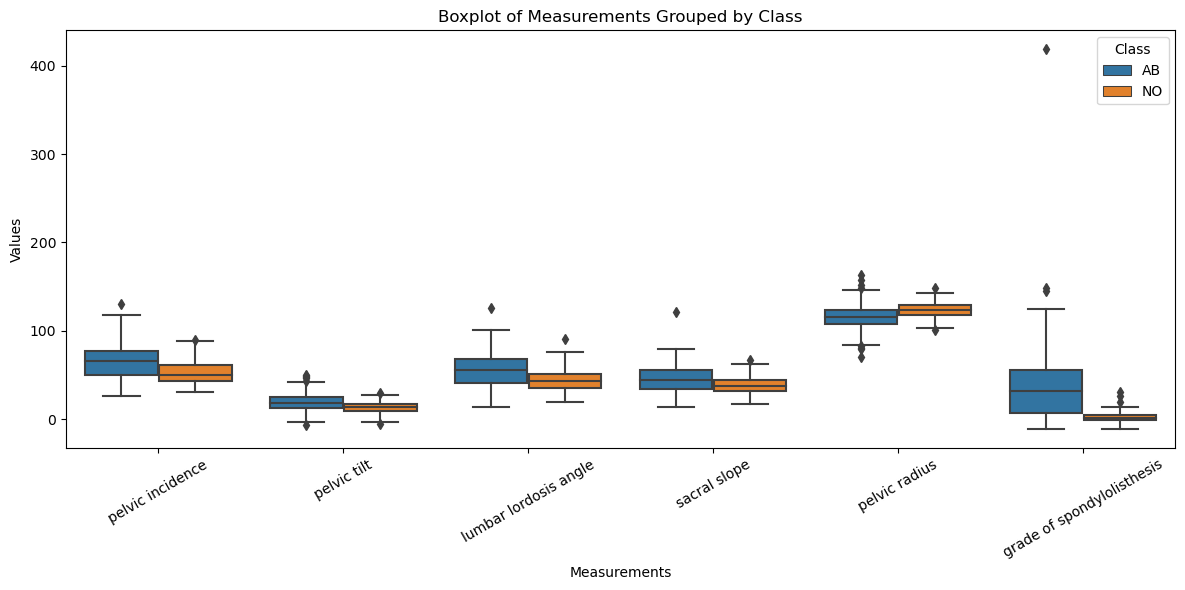

In [10]:
# Melt the DataFrame to convert it to long format
melted_df = pd.melt(df, id_vars=['class'], var_name='Measurements', value_name='Value')

# Create a boxplot for each variable grouped by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Measurements', y='Value', hue='class', data=melted_df)
plt.title('Boxplot of Measurements Grouped by Class')
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.legend(title='Class')
plt.xticks(rotation=30)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('boxplot_grouped_by_class.png')

# Show the plot
plt.show()

Even though there are outliers, these should be included since ideally the classifier should be able to classify these patients correctly.

# Class balancing

The number of normal pelvis in this dataset is much less to the number of abnormal pelvis, which is impractical. Hence, the number of normal pelvis should be increased, and the method to generate new normal cases is by Synthetic Minority Oversampling Technique (SMOTE), which create new instances as closest neighbours of existing instances.

In [11]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('class', axis=1)  # Replace 'class' with your actual target column name
y = df['class']

# Apply SMOTE for oversampling
smt = SMOTE(random_state=42)  
X_resampled, y_resampled = smt.fit_resample(X, y)

# Join the two dataset together
df_resampled = pd.concat([X_resampled, y_resampled], axis = 1)
df_resampled.describe()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,58.116011,16.432009,49.377529,41.684300,119.030383,19.834198
std,16.645664,9.480623,17.626904,12.583987,12.165703,34.084327
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,45.215710,9.825000,36.000000,32.980462,112.846127,0.387138
50%,54.745000,15.290000,46.898636,40.610943,119.320000,5.301012
75%,69.577500,21.120000,60.188830,50.036419,126.634813,31.862500
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


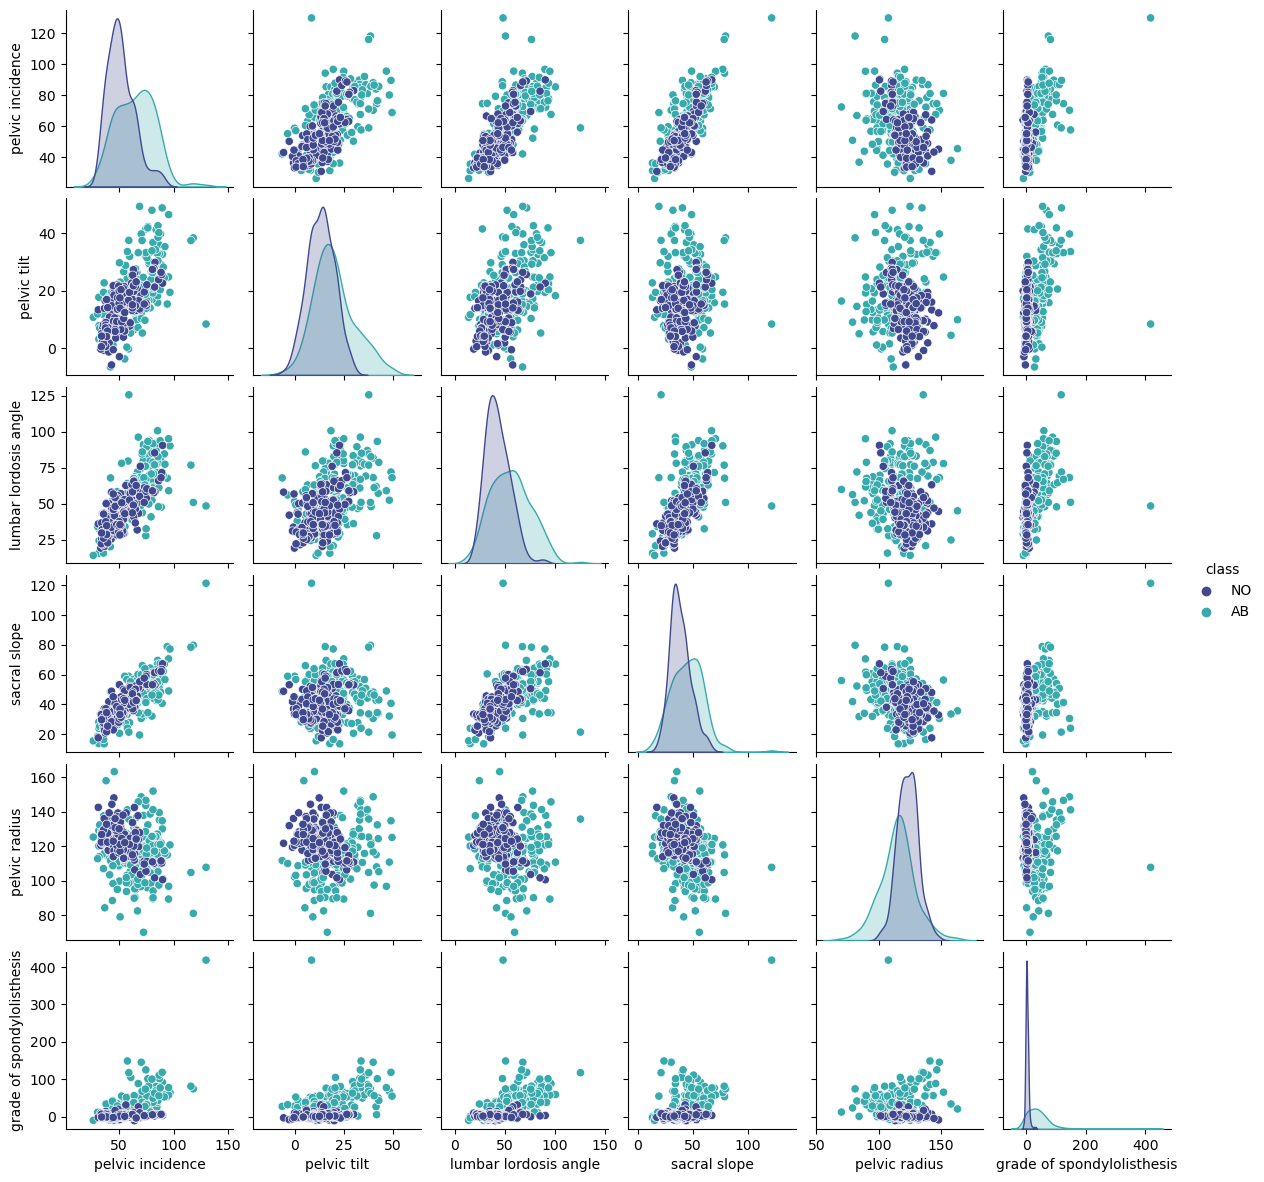

In [12]:
# Plot the resampled distribution of each class
sns.pairplot(df_resampled, hue="class", hue_order = ["NO", "AB"], palette = "mako",height=2)
plt.show()

# Statistical Analysis

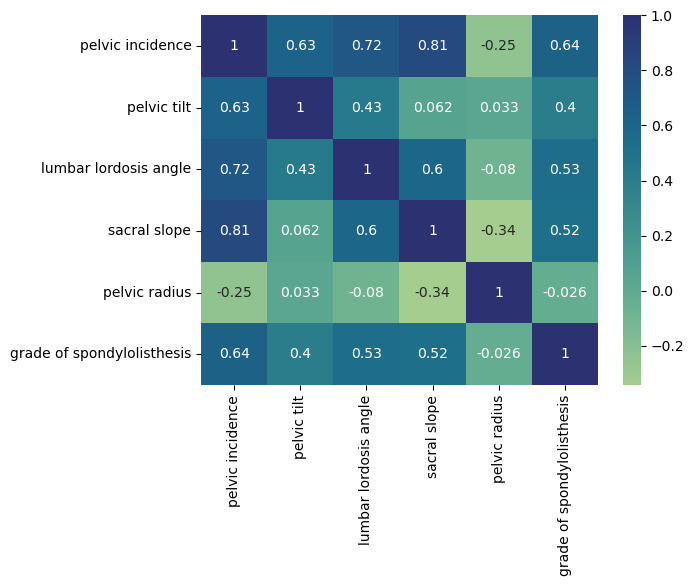

In [13]:
# Pearson correlation coefficients betweeen the numerical variables
corr = df.select_dtypes(float).corr(method = 'pearson')

# Plot the heatmap of the correlations
sns.heatmap(corr, cmap = 'crest', annot = True)
plt.show()

The pearson correlation coefficients between the measurements are mostly weakly and strongly correlated, except for pelvic radius which is independent from the rest of the measurements.

In [14]:
import scipy.stats as stats
import pingouin as pg
    
# Initialize a dictionary to store results
results = {'Measurement': [], 'Welch_F': [], 'Welch_p': [], 'Kruskal_H' : [], 'Kruskal_p' : []}

# Loop through each continuous variable
for col in df.select_dtypes(float).columns:
    # Separate data by class
    group_AB = df_resampled.loc[df_resampled['class'] == 'AB', col]
    group_NO = df_resampled.loc[df_resampled['class'] == 'NO', col]

    # Perform Welch's ANOVA using pingouin
    welch_results = pg.welch_anova(dv=col, between='class', data=df)

    # Check the column names in the result
    print(welch_results.columns)

    # Accessing Welch's ANOVA results with the correct column name
    welch_F = welch_results['F'].values[0]
    welch_p = welch_results['p-unc'].values[0]

    # Perform Kruskal-Wallis test using scipy
    H, p_kruskal = stats.kruskal(group_AB, group_NO)

    # Store results
    results['Measurement'].append(col)
    results['Welch_F'].append(welch_F)
    results['Welch_p'].append(welch_p)
    results['Kruskal_H'].append(H)
    results['Kruskal_p'].append(p_kruskal)
    
# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
results_df

Index(['Source', 'ddof1', 'ddof2', 'F', 'p-unc', 'np2'], dtype='object')
Index(['Source', 'ddof1', 'ddof2', 'F', 'p-unc', 'np2'], dtype='object')
Index(['Source', 'ddof1', 'ddof2', 'F', 'p-unc', 'np2'], dtype='object')
Index(['Source', 'ddof1', 'ddof2', 'F', 'p-unc', 'np2'], dtype='object')
Index(['Source', 'ddof1', 'ddof2', 'F', 'p-unc', 'np2'], dtype='object')
Index(['Source', 'ddof1', 'ddof2', 'F', 'p-unc', 'np2'], dtype='object')


,Measurement,Welch_F,Welch_p,Kruskal_H,Kruskal_p
0,pelvic incidence,56.108101,1.015650e-12,63.610381,1.516280e-15
1,pelvic tilt,49.256630,1.684393e-11,45.660080,1.406604e-11
2,lumbar lordosis angle,45.495999,8.499470e-11,52.884507,3.537489e-13
3,sacral slope,18.893503,1.945042e-05,27.052270,1.980275e-07
4,pelvic radius,44.189037,1.535899e-10,53.206247,3.003022e-13
5,grade of spondylolisthesis,152.897379,2.995444e-27,173.161751,1.508845e-39


The result of the Welch's ANOVA test and Kruskal-Wallis test suggested there is a significant difference between the classes from each measurement, with all p-value below a significance level of 0.01.

# PCA Transformation

Attempt at transforming the data variables into principal components that captures the variances across the pelvic measures. If the principal components show a clearer separation between the normal pelvis and abnormal pelvis, then the transformed data is used for classifier training.

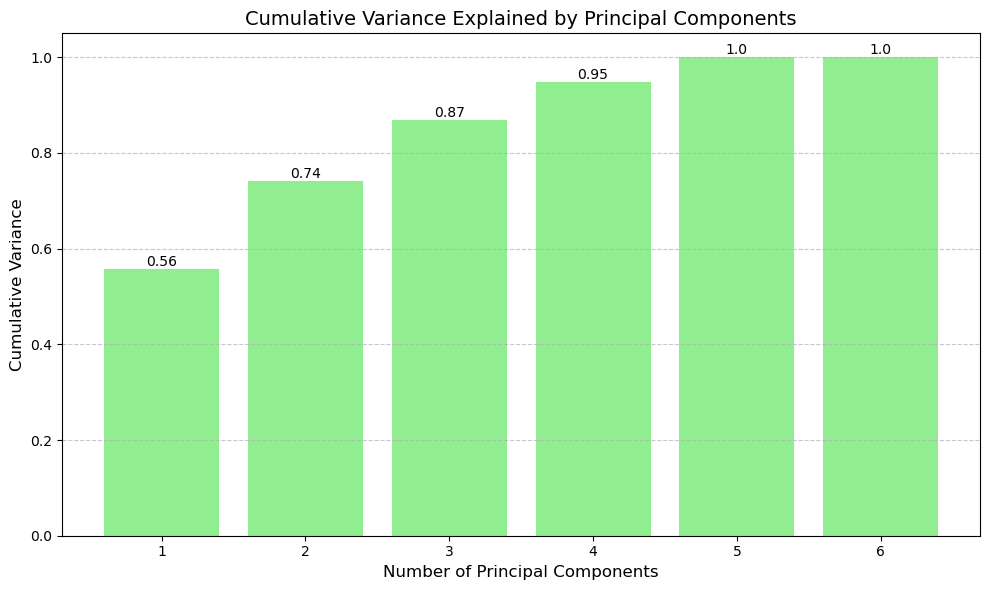

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_resampled is the dataset with the 'class' target column
X = df_resampled.drop('class', axis=1)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()  # Fit PCA with all components
X_pca = pca.fit_transform(X_scaled)

# Calculate proportion of variances and cumulative variance
proportion_variance = pca.explained_variance_ratio_
cumulative_variance = proportion_variance.cumsum()

# Bar plot for cumulative variance
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color='lightgreen')

# Display cumulative variance on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

plt.title('Cumulative Variance Explained by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Variance', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display plot
plt.show()

The 95% cumulative variance of the measurements are captured by principal component 1,2,3,4, and keeping these principal components as the feature of the classifier is sufficient.

In [16]:
# Create a dataframe to display the loadings
loadings_df = pd.DataFrame(pca.components_, columns=X.columns)
loadings_df.index = loadings_df.index + 1
loadings_df = loadings_df.rename_axis('Principal Component').rename(lambda x: f'PC{x}')

# Display loadings
loadings_df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
Principal Component,,,,,,
PC1,0.528500,0.336845,0.457224,0.445308,-0.185617,0.406713
PC2,0.005452,0.497556,0.108321,-0.367645,0.750857,0.204269
PC3,0.082051,0.667226,-0.184225,-0.394142,-0.536886,-0.265602
PC4,-0.160287,-0.047787,-0.440471,-0.175998,-0.217376,0.836529
PC5,-0.400989,-0.142818,0.742468,-0.422797,-0.257413,0.150109
PC6,0.726251,-0.413645,0.000003,-0.549051,-0.000008,0.000011


In [17]:
from sklearn.decomposition import PCA

# Perform PCA with number of components that retains most of the variance of the data
pca = PCA(n_components=4)  # Specify the number of components
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
principal_df = pd.concat([principal_df, df_resampled['class']], axis = 1)

# Display dataframe
principal_df

,PC1,PC2,PC3,PC4,class
0,-16.900625,-14.066207,-17.659550,13.197294,AB
1,-30.642445,17.755235,-12.008457,2.580730,AB
2,-13.354511,-24.029734,-8.006029,8.207348,AB
3,-2.555282,-14.360565,-14.667621,12.950958,AB
4,-20.406860,6.886721,-18.779465,0.879685,AB
...,...,...,...,...,...
415,-20.323261,-7.768555,-7.118128,-3.844870,NO
416,10.902496,-42.270919,0.853369,4.999717,NO
417,-26.869110,8.326819,-4.671712,8.727743,NO
418,-22.608640,-6.846855,4.920186,-21.174730,NO


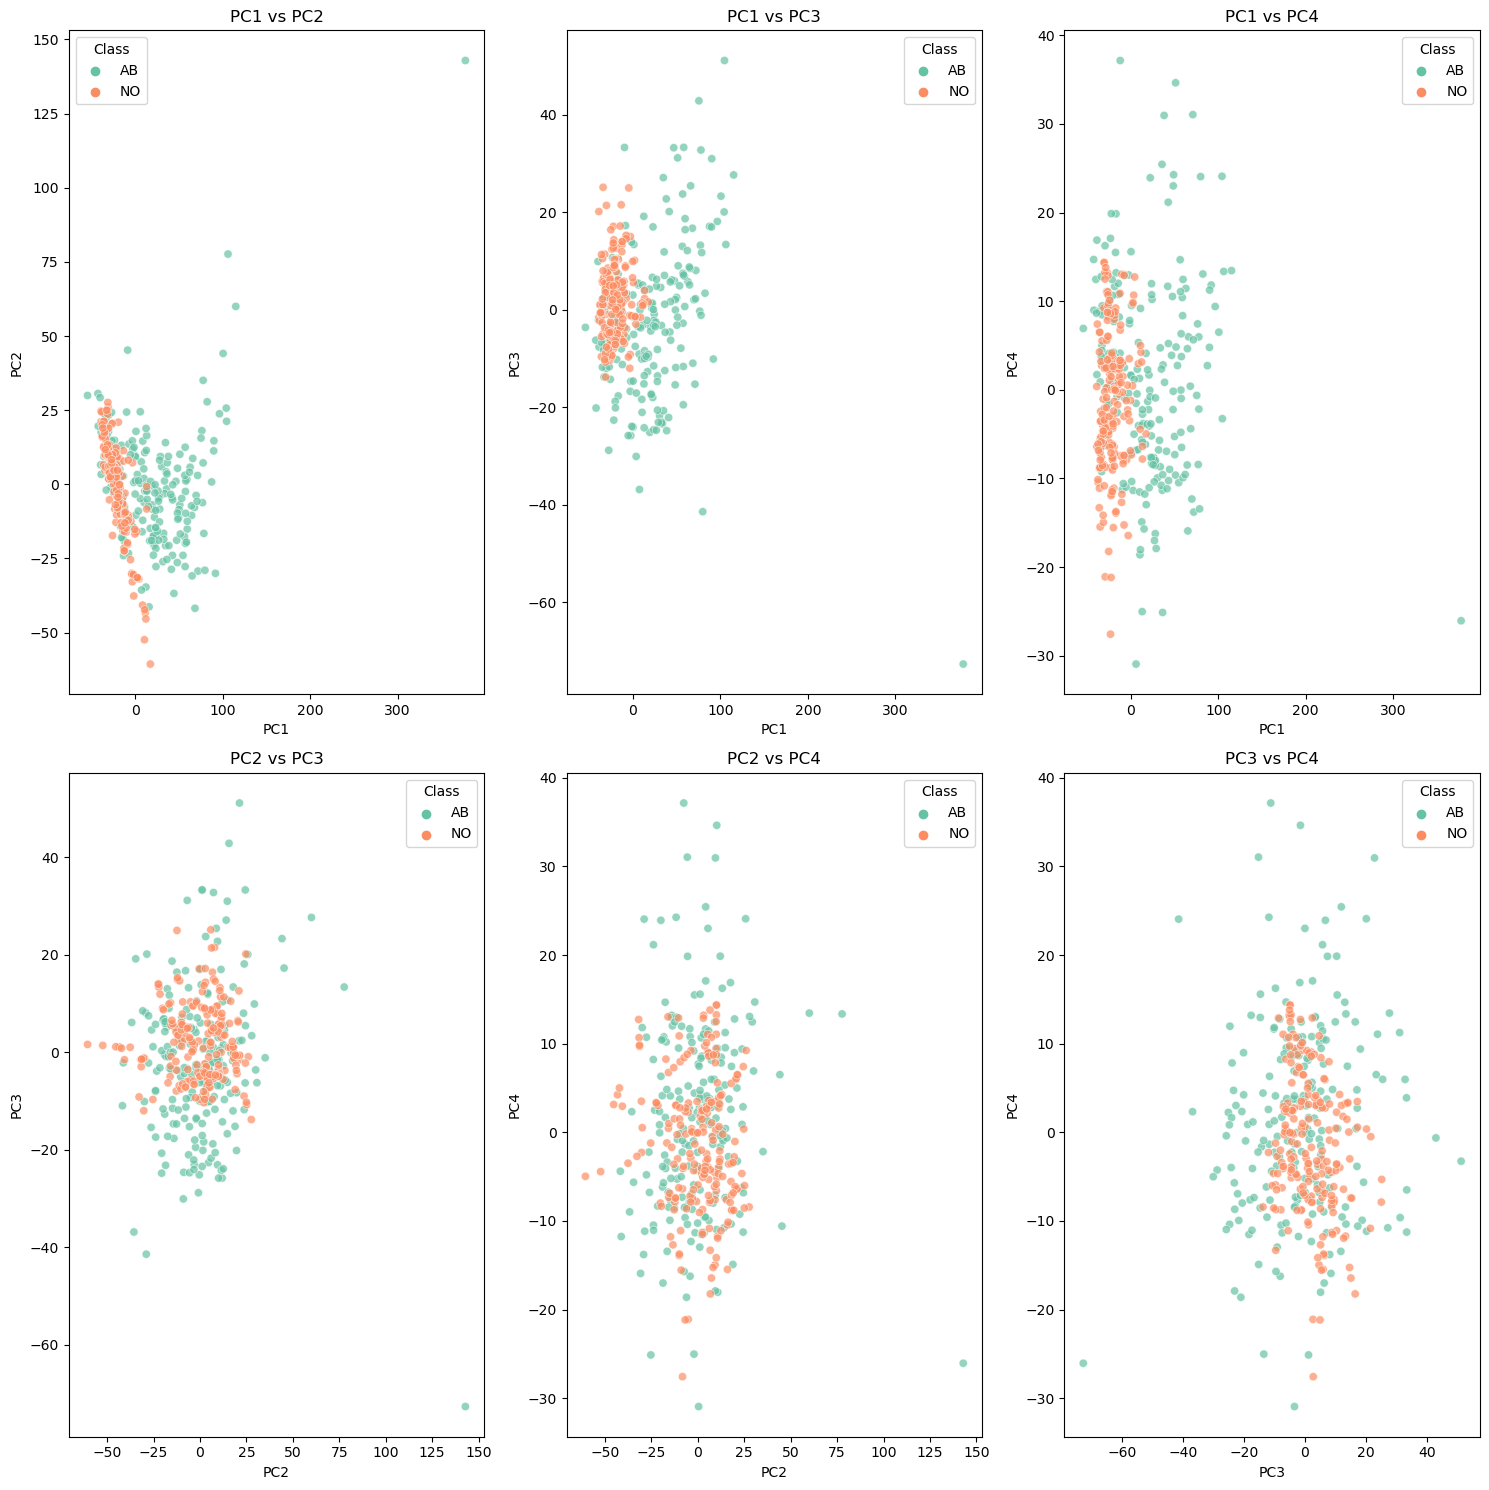

In [18]:
import itertools

# Remove 'class' column for plotting the features
features = principal_df.drop('class', axis=1).columns

# Create a grid of subplots
num_features = len(features)
fig, axes = plt.subplots(2,3, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each pair of features and create a scatterplot
for i, (feature1, feature2) in enumerate(itertools.combinations(features, 2)):
    ax = axes[i]
    
    # Scatter plot for the current pair of features, grouped by 'class'
    sns.scatterplot(data=principal_df, x=feature1, y=feature2, hue='class', ax=ax, palette='Set2', alpha=0.7)
    
    # Set labels for each subplot
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.legend(title='Class', loc='best')
    
    # Set the title for each plot
    ax.set_title(f'{feature1} vs {feature2}')

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

The separation of the clusters shown in the pairplot of the principal components is similar to the pairplot of the original measurements of the pelvis. Therefore, the principal component transformation is redundant, and the resampled dataset should be used for simplicity.

# Classifiers

The size of the training data is not too big, hence the following models are considered as classifiers for simplicity:
- Logistic Regression
- Random Forest
- Support Vector Machine

The optimal model is selected based on the mean evaluation metrics (accuracy, recall on abnormal pelvis, ROC AUC) across 5-fold cross validation.

Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating Support Vector Classifier...


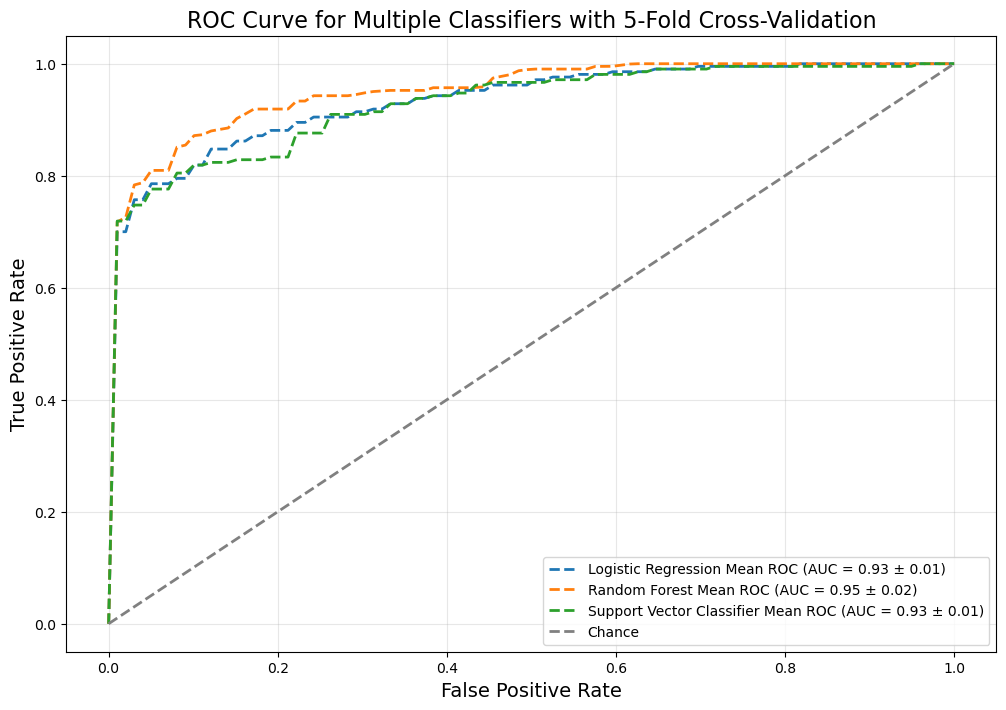

Logistic Regression - Mean Accuracy: 0.8595, Mean Recall (class 'AB'): 0.8143
Random Forest - Mean Accuracy: 0.8929, Mean Recall (class 'AB'): 0.8476
Support Vector Classifier - Mean Accuracy: 0.8476, Mean Recall (class 'AB'): 0.7048


In [19]:
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Separate the features and the target for upsampled data
X = df_resampled.drop('class', axis=1)
y = df_resampled['class']

# Map 'AB' to 1 and 'NO' to 0
y = np.array([1 if label == 'AB' else 0 for label in y])

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(kernel='rbf', class_weight={1: 1, 0: 1}, probability=True, random_state=42)
}

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot for each classifier
plt.figure(figsize=(12, 8))

# Initialize dictionaries to store accuracy and recall scores
mean_accuracy = {}
mean_recall = {}

for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    
    accuracies = []
    recalls = []
    
    # Perform cross-validation
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the classifier
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        # Compute accuracy and recall
        accuracies.append(accuracy_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred, pos_label=1))

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Interpolate the true positive rate
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Calculate mean accuracy and recall
    mean_accuracy[name] = np.mean(accuracies)
    mean_recall[name] = np.mean(recalls)

    # Plot mean ROC curve for the classifier
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, linestyle='--', lw=2,
             label=f'{name} Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Chance')

# Add labels and legend
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Multiple Classifiers with 5-Fold Cross-Validation', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Print the mean accuracy and recall for each classifier
for name in classifiers.keys():
    print(f"{name} - Mean Accuracy: {mean_accuracy[name]:.4f}, Mean Recall (class 'AB'): {mean_recall[name]:.4f}")


The evaluation metrics all suggested Random Forest to be the better model, with highest mean accuracy (89%) and mean recall (85%) on abnormal pelvis, and the area under curve of the ROC plot is the greatest against the chance line which means it is the least prone to overfit.

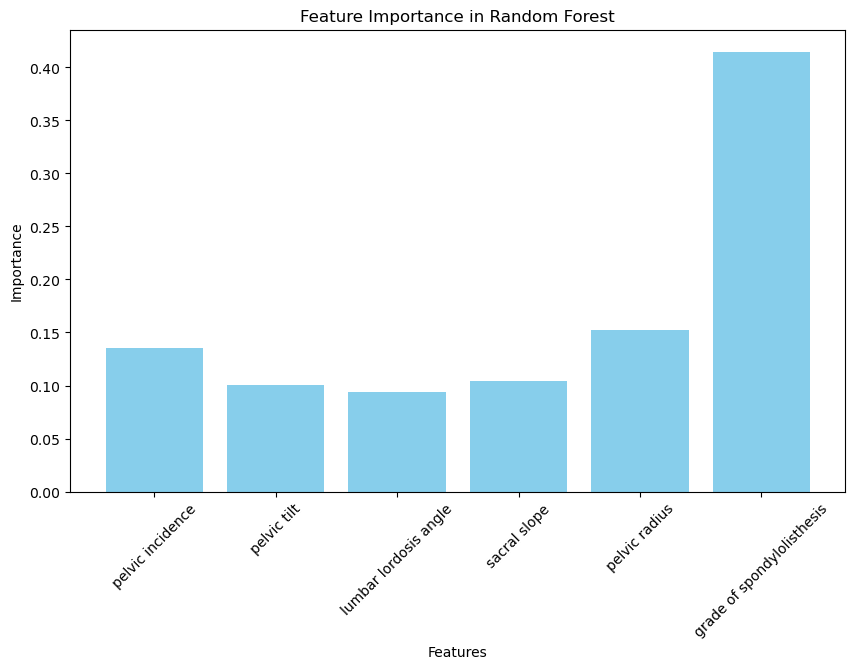

In [20]:
# Retrain Random Forest model
RF = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF.fit(X, y)

# Extract feature importance of the Random Forest
feature_importances = RF.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(df_resampled.drop('class', axis = 1).columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.show()


The grade of spondylolisthesis is the feature with the highest importance (40%), which is the main contributor for the Random Forest model to classify the pelvis correctly. The other features contribute just as much as each other.